# Imports

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LogisticRegression, BayesianRidge, TweedieRegressor, SGDClassifier 
from sklearn.svm import SVR


from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *

# DataFrame, Data et Variables

In [306]:
df = pd.read_csv('logicimmo - Copie.csv')
X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
3643,417,6,4,9900000,75016,5,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
3642,416,1,8,9375000,75116,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
508,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,1,-1,-1,-1,-1
2302,254,6,3,9225000,75008,2,10,7,1,1,-1,-1,-1,1,-1,-1,-1
507,393,8,3,9000000,75116,0,10,5,1,1,1,-1,-1,1,-1,-1,-1
2301,393,8,3,9000000,75116,0,10,5,1,1,-1,-1,-1,1,-1,-1,-1
3641,265,6,2,7290000,75116,5,4,3,1,1,-1,-1,-1,-1,-1,-1,-1
3640,274,7,4,6950000,75007,4,10,-1,1,1,-1,-1,-1,-1,-1,-1,-1
3639,187,4,2,6600000,75008,0,10,8,1,1,-1,-1,-1,1,-1,-1,-1
3957,460,8,5,6500000,75116,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1


In [307]:
compteur = 0
for prix in y :
    if prix > 2000000 :
        compteur += 1
        df.drop(df[df['Prix (Euros)'] == prix].index, inplace = True)

print("Nombre de bien supprimé : ",compteur)

X = df.drop('Prix (Euros)', axis = 1)
y = df['Prix (Euros)']

df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

Nombre de bien supprimé :  224


,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
2251,168,6,4,2000000,75009,0,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
2248,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,1,1,-1,-1,-1
460,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,-1,1,-1,-1,-1
461,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,1,-1,-1,-1,-1
462,133,5,3,1990000,75016,0,1,2,1,1,-1,-1,1,1,-1,-1,-1
3536,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,-1,-1,-1,-1,-1
2250,188,7,4,1990000,75016,4,10,3,1,1,1,1,1,1,-1,-1,-1
2249,133,5,3,1990000,75016,0,1,2,1,1,1,-1,1,1,-1,-1,-1
3535,138,5,3,1984000,75008,2,10,5,1,1,-1,-1,-1,-1,-1,-1,-1
3937,156,1,5,1980000,75005,6,10,2,1,1,-1,-1,-1,-1,-1,-1,-1


In [308]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [309]:
MAE_list = []
RMSE_list = []
median_abs_err_list = []
model_list = []
score_list = []
mean_error_list = []
r2_list = []
max_error_list = []
variance_list = []
percentage_error_list = []

# Modèles  :

### Regression linéaire 

In [310]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train,y_train)
score_lin_reg = model_lin_reg.score(X_test,y_test)
score_list.append(score_lin_reg)
score_lin_reg

0.8487142531049255

In [311]:
cross_val_score(model_lin_reg, X, y, cv=3)

array([0.76628486, 0.75249295, 0.89216701])

In [312]:
linear_selector = SelectFromModel(LinearRegression(),threshold='mean')
linear_selector.fit_transform(X,y)
linear_selector.get_support()

array([False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True])

In [313]:
y_pred = model_lin_reg.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  88623.47086474713
RMSE :  152176.03057018467
median absolut error :  50699.53706546128
R2 score :  0.8487142531049255
Max error :  1416174.815541938
Explained variance :  0.8489930278494893
mean abs percentage error :  0.1952423794227564


In [314]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Regression \nLineaire")

<function matplotlib.pyplot.show(close=None, block=None)>

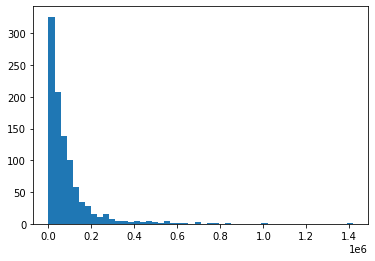

In [315]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [316]:
cross_val_score(model_lin_reg, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -84101.82375367, -108086.31427521,  -84671.73421657])

### Lasso CV

In [317]:
model_lasso_cv = LassoCV(cv=5)
model_lasso_cv.fit(X_train, y_train)
score_lasso_cv = model_lasso_cv.score(X_test, y_test)
score_list.append(score_lasso_cv)
score_lasso_cv

0.8447668395455333

In [318]:
cross_val_score(model_lasso_cv, X, y, cv=3)

array([0.75473795, 0.74855568, 0.89655072])

In [319]:
lasso_selector = SelectFromModel(LassoCV(cv=3),threshold='mean')
lasso_selector.fit_transform(X,y)
lasso_selector.get_support()

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [320]:
y_pred = model_lasso_cv.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  89018.53190874284
RMSE :  154148.56796425677
median absolut error :  48824.29585066438
R2 score :  0.8447668395455333
Max error :  1333760.4089571536
Explained variance :  0.8450872502282412
mean abs percentage error :  0.1861813288750902


In [321]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Lasso CV")

<function matplotlib.pyplot.show(close=None, block=None)>

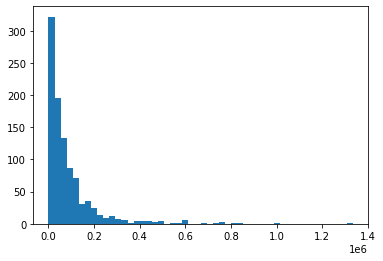

In [322]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [323]:
cross_val_score(model_lasso_cv, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -85806.80155977, -108917.59778014,  -77427.23024383])

### Ridge

In [324]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
score_ridge = model_ridge.score(X_test, y_test)
score_list.append(score_ridge)
score_ridge

0.8487158760696166

In [325]:
cross_val_score(model_ridge, X, y, cv=3)

array([0.76627997, 0.75248025, 0.89224079])

In [326]:
Ridge_selector = SelectFromModel(Ridge(),threshold='mean')
Ridge_selector.fit_transform(X,y)
Ridge_selector.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True])

In [327]:
y_pred = model_ridge.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  88627.51051932987
RMSE :  152175.21431025307
median absolut error :  50655.19991889596
R2 score :  0.8487158760696166
Max error :  1416228.5892025381
Explained variance :  0.8489946139702236
mean abs percentage error :  0.1952407008898672


In [328]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Ridge")

<function matplotlib.pyplot.show(close=None, block=None)>

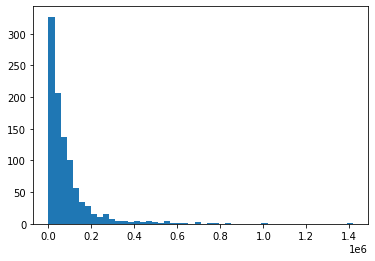

In [329]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [330]:
cross_val_score(model_ridge, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -84102.35658601, -108087.71219265,  -84626.61178151])

### SVR

In [331]:
#model_SVR = SVR(kernel='rbf')
#model_SVR.fit(X_train,y_train)
#model_SVR.score(X_test,y_test)
#score trop faible, process long -> inutile

### SGDClassifier

In [332]:
#model_SGD = SGDClassifier(max_iter=1000, tol=0.01)
#model_SGD.fit(X_train,y_train)
#model_SGD.score(X_test,y_test)

### LogisticRegression

In [333]:
#model_logistic_reg = LogisticRegression()
#model_logistic_reg.fit(X_train,y_train)
#model_logistic_reg.score(X_test,y_test)

### BayesianRidge

In [334]:
model_bayesian = BayesianRidge()
model_bayesian.fit(X_train, y_train)
score_bayesian = model_bayesian.score(X_test, y_test)
score_list.append(score_bayesian)
score_bayesian

0.8486877067318661

In [335]:
cross_val_score(model_bayesian, X, y, cv=3)

array([0.76432684, 0.75180817, 0.89329999])

In [336]:
selector_bayesian = SelectFromModel(BayesianRidge(),threshold='mean')
selector_bayesian.fit_transform(X,y)
selector_bayesian.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

In [337]:
y_pred = model_bayesian.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  88655.72315947033
RMSE :  152189.38128088418
median absolut error :  50674.61609201133
R2 score :  0.8486877067318661
Max error :  1417946.7221859992
Explained variance :  0.8489605991412865
mean abs percentage error :  0.19482107448620595


In [338]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Bayesian \nRidge")

<function matplotlib.pyplot.show(close=None, block=None)>

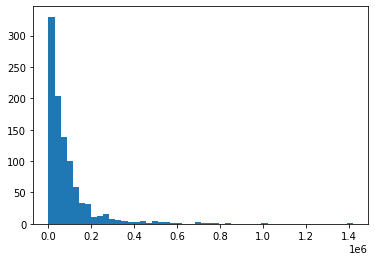

In [339]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [340]:
cross_val_score(model_bayesian, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -84432.36017528, -108049.82194951,  -83779.26364778])

### TweedieRegressor

In [341]:
model_tweedie = TweedieRegressor(max_iter=1000)
model_tweedie.fit(X_train, y_train)
score_tweedie = model_tweedie.score(X_test, y_test)
score_list.append(score_tweedie)
score_tweedie

0.846633318082015

In [342]:
cross_val_score(model_tweedie, X, y, cv=3)

array([0.75600172, 0.74805638, 0.89821984])

In [343]:
selector_tweedie = SelectFromModel(TweedieRegressor(max_iter=1000),threshold='mean')
selector_tweedie.fit_transform(X,y)
selector_tweedie.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False,  True, False,  True, False, False, False])

In [344]:
y_pred = model_tweedie.predict(X_test)
print('MAE : ', mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('median absolut error : ', median_absolute_error(y_test, y_pred))
print('R2 score : ', r2_score(y_test, y_pred))
print('Max error : ', max_error(y_test, y_pred))
print('Explained variance : ', explained_variance_score(y_test, y_pred))
print('mean abs percentage error : ', mean_absolute_percentage_error(y_test, y_pred))

MAE :  88922.31656808803
RMSE :  153219.04658533316
median absolut error :  50741.70140136476
R2 score :  0.846633318082015
Max error :  1367787.3565465454
Explained variance :  0.8469227858089036
mean abs percentage error :  0.18717628640823206


In [345]:
MAE_list.append(mean_absolute_error(y_test,y_pred))
RMSE_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
median_abs_err_list.append(median_absolute_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
max_error_list.append(max_error(y_test, y_pred))
variance_list.append(explained_variance_score(y_test, y_pred))
percentage_error_list.append(mean_absolute_percentage_error(y_test, y_pred))
model_list.append("Tweedie \nRegressor")

<function matplotlib.pyplot.show(close=None, block=None)>

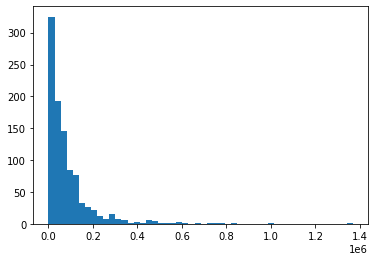

In [346]:
error_hist = np.abs(y_test - y_pred)
mean_error_list.append(error_hist.mean())
plt.hist(error_hist, bins=50)
plt.show

In [347]:
cross_val_score(model_tweedie, X, y, cv=3, scoring='neg_mean_absolute_error')

array([ -86153.12866475, -109053.15756347,  -77281.37555665])

# Comparaisons des modèles

### Résultats :

#### Précision 

Text(0, 0.5, 'Accuracy')

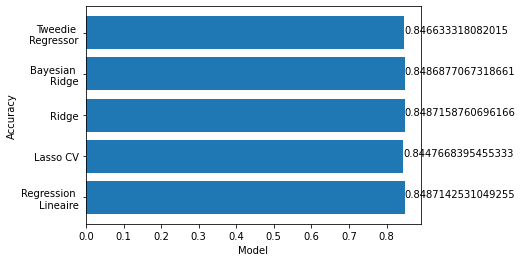

In [348]:
plt.barh(model_list, score_list)
for index, value in enumerate(score_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Erreurs : 

Text(0, 0.5, 'Mean error')

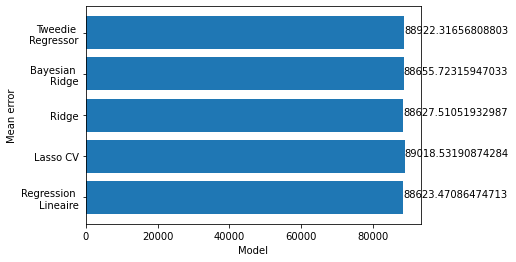

In [349]:
plt.barh(model_list, mean_error_list)
for index, value in enumerate(mean_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean error')

Text(0, 0.5, 'MAE')

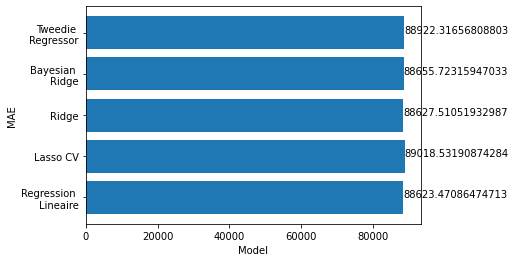

In [350]:
plt.barh(model_list, MAE_list)
for index, value in enumerate(MAE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('MAE')

Text(0, 0.5, 'RMSE')

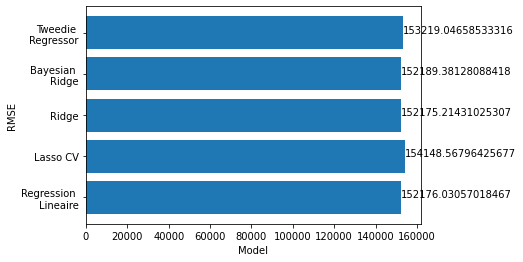

In [351]:
plt.barh(model_list, RMSE_list)
for index, value in enumerate(RMSE_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('RMSE')

Text(0, 0.5, 'Median Abs Error')

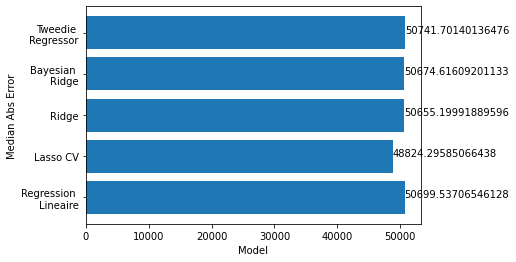

In [352]:
plt.barh(model_list, median_abs_err_list)
for index, value in enumerate(median_abs_err_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Median Abs Error')

Text(0, 0.5, 'r2 score')

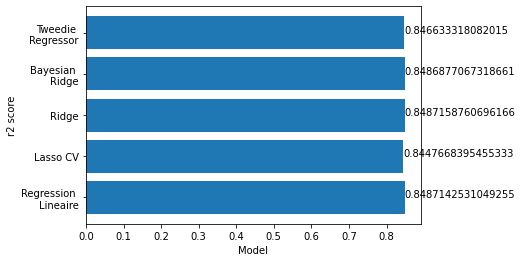

In [353]:
plt.barh(model_list, r2_list)
for index, value in enumerate(r2_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('r2 score')

Text(0, 0.5, 'Max Error')

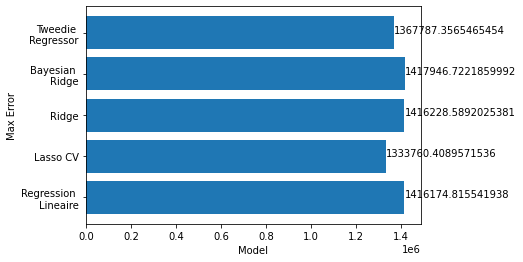

In [354]:
plt.barh(model_list, max_error_list)
for index, value in enumerate(max_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Max Error')

Text(0, 0.5, 'Explained Variance Score')

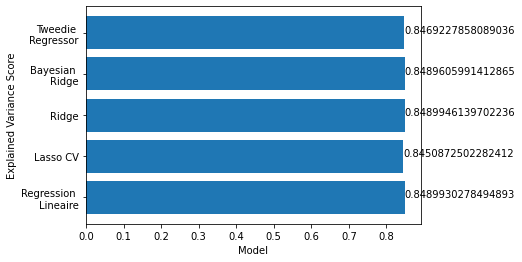

In [355]:
plt.barh(model_list, variance_list)
for index, value in enumerate(variance_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Explained Variance Score')

Text(0, 0.5, 'Mean Abs Percentage Error')

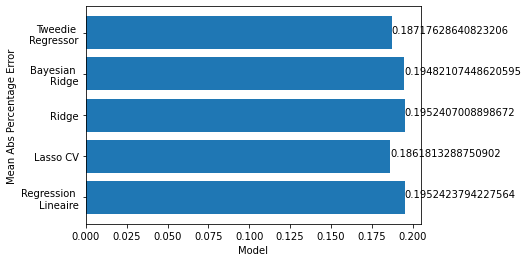

In [356]:
plt.barh(model_list, percentage_error_list)
for index, value in enumerate(percentage_error_list):
    plt.text(value, index, str(value))
plt.xlabel('Model')
plt.ylabel('Mean Abs Percentage Error')

### Features : 

In [357]:
df.head()

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
0,64,3,2,830000,75017,5,1,3,1,1,-1,-1,-1,-1,-1,-1,-1
1,122,5,5,1470000,75015,0,10,3,1,1,1,1,1,1,-1,-1,1
2,5,1,0,65000,75116,5,6,6,1,1,-1,-1,-1,1,1,1,-1
3,7,1,0,80000,75015,0,4,7,1,1,-1,-1,-1,-1,1,-1,-1
4,8,1,0,87000,75006,0,4,6,1,1,-1,-1,-1,1,1,-1,-1


In [358]:
df[['Code Postal','Prix (Euros)', 'Superficie (m2)']]

,Code Postal,Prix (Euros),Superficie (m2)
0,75017,830000,64
1,75015,1470000,122
2,75116,65000,5
3,75015,80000,7
4,75006,87000,8
...,...,...,...
5151,75015,240000,16
5152,75011,240000,22
5153,75009,240000,0
5154,75016,240000,16


In [359]:
print(df["Code Postal"].value_counts())
print(df.groupby('Code Postal')['Prix (Euros)'].mean())

75018    639
75015    532
75017    438
75019    345
75020    335
75016    321
75011    292
75014    282
75010    267
75013    264
75012    223
75009    173
75007    128
75006    119
75005    117
75008    101
75003     94
75004     88
75002     76
75116     55
75001     43
Name: Code Postal, dtype: int64
Code Postal
75001    609783.720930
75002    391514.473684
75003    732075.531915
75004    625607.840909
75005    522330.769231
75006    654425.714286
75007    752905.468750
75008    760256.336634
75009    599421.387283
75010    454153.662921
75011    438668.458904
75012    449231.735426
75013    451530.094697
75014    514674.255319
75015    498635.460526
75016    573643.514019
75017    468571.301370
75018    385280.974961
75019    424292.886957
75020    401352.002985
75116    577070.000000
Name: Prix (Euros), dtype: float64


In [360]:
print(df["Superficie (m2)"].value_counts())
print(df.groupby('Superficie (m2)')['Prix (Euros)'].mean())

38     136
18     122
36     117
42     116
8      107
      ... 
229      1
131      1
237      1
180      1
156      1
Name: Superficie (m2), Length: 166, dtype: int64
Superficie (m2)
0      1.638115e+05
5      6.220833e+04
6      6.961028e+04
7      8.612788e+04
8      8.968505e+04
           ...     
177    1.670000e+06
180    9.800000e+05
188    1.990000e+06
229    1.360000e+06
237    1.350000e+06
Name: Prix (Euros), Length: 166, dtype: float64


In [361]:
print(df["Nombre Pieces"].value_counts())
print(df.groupby('Nombre Pieces')['Prix (Euros)'].mean())

1    1803
2    1726
3     812
4     360
5     175
6      49
7       7
Name: Nombre Pieces, dtype: int64
Nombre Pieces
1    2.249640e+05
2    4.309653e+05
3    7.029517e+05
4    1.043706e+06
5    1.364352e+06
6    1.573694e+06
7    1.588286e+06
Name: Prix (Euros), dtype: float64


In [362]:
print(df["Nombre Chambres"].value_counts())
print(df.groupby('Nombre Chambres')['Prix (Euros)'].mean())

1    1862
0    1808
2     857
3     298
4      99
5       8
Name: Nombre Chambres, dtype: int64
Nombre Chambres
0    2.263572e+05
1    4.546394e+05
2    7.888278e+05
3    1.125345e+06
4    1.461194e+06
5    1.393625e+06
Name: Prix (Euros), dtype: float64


In [363]:
print(df["Classe Energetique"].value_counts())
print(df.groupby('Classe Energetique')['Prix (Euros)'].mean())

0    1685
5    1014
4     821
7     589
6     554
3     207
1      31
2      31
Name: Classe Energetique, dtype: int64
Classe Energetique
0    432055.472997
1    527762.903226
2    802106.322581
3    710939.613527
4    685726.182704
5    524808.343195
6    403498.808664
7    319012.782683
Name: Prix (Euros), dtype: float64


In [364]:
print(df["Nombre Photos"].value_counts())
print(df.groupby('Nombre Photos')['Prix (Euros)'].mean())

10    1650
6      546
7      521
8      513
9      478
5      425
4      345
3      209
1      129
2       95
0       21
Name: Nombre Photos, dtype: int64
Nombre Photos
0     293835.238095
1     382763.868217
2     397794.178947
3     271269.717703
4     301280.950725
5     324222.261176
6     384534.369963
7     401925.973129
8     459347.095517
9     528582.223849
10    680934.421818
Name: Prix (Euros), dtype: float64


In [365]:
print(df["Etage"].value_counts())
print(df.groupby('Etage')['Prix (Euros)'].mean())

 1    913
-1    860
 2    743
 3    636
 4    522
 6    510
 5    399
 7    250
 8     75
 9     24
Name: Etage, dtype: int64
Etage
-1    443440.132558
 1    534150.982475
 2    553838.549125
 3    577341.863208
 4    552745.009579
 5    518153.350877
 6    326742.786275
 7    264210.368000
 8    450657.866667
 9    561707.500000
Name: Prix (Euros), dtype: float64


In [366]:
print(df["Terrasse"].value_counts())
print(df.groupby('Terrasse')['Prix (Euros)'].mean())

-1    4237
 1     695
Name: Terrasse, dtype: int64
Terrasse
-1    460458.118480
 1    679160.568345
Name: Prix (Euros), dtype: float64


In [367]:
print(df["Parking"].value_counts())
print(df.groupby('Parking')['Prix (Euros)'].mean())

-1    4682
 1     250
Name: Parking, dtype: int64
Parking
-1    481395.635626
 1    676333.108000
Name: Prix (Euros), dtype: float64


In [368]:
print(df["Cave"].value_counts())
print(df.groupby('Cave')['Prix (Euros)'].mean())

-1    2674
 1    2258
Name: Cave, dtype: int64
Cave
-1    401859.581152
 1    597167.902126
Name: Prix (Euros), dtype: float64


In [369]:
print(df["Ascenseur"].value_counts())
print(df.groupby('Ascenseur')['Prix (Euros)'].mean())

-1    3135
 1    1797
Name: Ascenseur, dtype: int64
Ascenseur
-1    425482.738118
 1    606059.687813
Name: Prix (Euros), dtype: float64


In [370]:
print(df["Gardien"].value_counts())
print(df.groupby('Gardien')['Prix (Euros)'].mean())

-1    3864
 1    1068
Name: Gardien, dtype: int64
Gardien
-1    466037.253106
 1    582593.349251
Name: Prix (Euros), dtype: float64


In [371]:
print(df["Renove"].value_counts())
print(df.groupby('Renove')['Prix (Euros)'].mean())

-1    4671
 1     261
Name: Renove, dtype: int64
Renove
-1    487772.518304
 1    553993.141762
Name: Prix (Euros), dtype: float64


In [372]:
print(df["Box"].value_counts())
print(df.groupby('Box')['Prix (Euros)'].mean())

-1    4928
 1       4
Name: Box, dtype: int64
Box
-1    490931.339894
 1    917000.000000
Name: Prix (Euros), dtype: float64


### Les prix trop élevés affectent les métriques

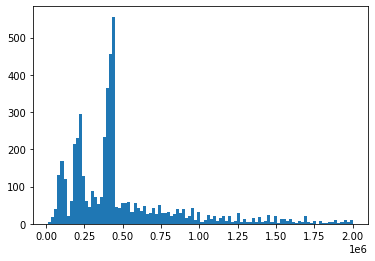

In [373]:
plt.hist(y, bins=100)
plt.show()

In [374]:
print(max(y))

2000000


Text(0, 0.5, 'prix')

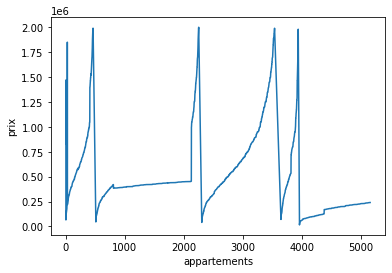

In [375]:
ax = df['Prix (Euros)'].plot()
ax.set_xlabel("appartements")
ax.set_ylabel("prix")

In [376]:
val = []
for i in y :
    if i > 6000000 :
        val.append(i)
print(len(val))
print(val)

0
[]


In [377]:
df.sort_values(by=['Prix (Euros)'], ascending=False).head(15)

,Superficie (m2),Nombre Pieces,Nombre Chambres,Prix (Euros),Code Postal,Classe Energetique,Nombre Photos,Etage,Type de Bien,Type Vendeur,Terrasse,Parking,Cave,Ascenseur,Gardien,Renove,Box
2251,168,6,4,2000000,75009,0,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
2248,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,1,1,-1,-1,-1
460,100,3,2,1990000,75001,0,10,4,1,1,-1,-1,-1,1,-1,-1,-1
461,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,1,-1,-1,-1,-1
462,133,5,3,1990000,75016,0,1,2,1,1,-1,-1,1,1,-1,-1,-1
3536,188,7,4,1990000,75016,4,10,3,1,1,-1,-1,-1,-1,-1,-1,-1
2250,188,7,4,1990000,75016,4,10,3,1,1,1,1,1,1,-1,-1,-1
2249,133,5,3,1990000,75016,0,1,2,1,1,1,-1,1,1,-1,-1,-1
3535,138,5,3,1984000,75008,2,10,5,1,1,-1,-1,-1,-1,-1,-1,-1
3937,156,1,5,1980000,75005,6,10,2,1,1,-1,-1,-1,-1,-1,-1,-1
